In [1]:
# VARIABLE DESCRIPTIONS

# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) 
# survival - Survival (0 = No; 1 = Yes) 
# name - Name 
# sex - Sex 
# age - Age 
# sibsp - Number of Siblings/Spouses Aboard 
# parch - Number of Parents/Children Aboard 
# ticket - Ticket Number 
# fare - Passenger Fare (British pound) 
# cabin - Cabin 
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 
# boat - Lifeboat 
# body - Body Identification Number 
# home.dest - Home/Destination

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [4]:
# Get titanic data (csv) as dataframe: 
Location = "C:\\Users\Matthew\\Desktop\\titanic3 (1).csv"

In [5]:
# Read the file:
df = pd.read_csv(Location)

In [6]:
# Preview Data:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
Categorical = ['name', 'sex', 'cabin', 'embarked','home.dest']

In [10]:
df[Categorical].describe()

,name,sex,cabin,embarked,home.dest
count,1309,1309,295,1307,745
unique,1307,2,186,3,369
top,"Kelly, Mr. James",male,C23 C25 C27,S,"New York, NY"
freq,2,843,6,914,64


In [11]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [12]:
# Previewing Dependent Variable 'survived'
df.survived.value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [13]:
df.survived.value_counts() * 100/len(df)

0.0    61.755725
1.0    38.167939
Name: survived, dtype: float64

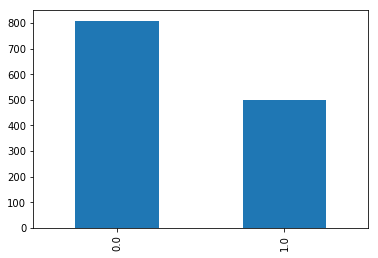

In [14]:
%matplotlib inline
alpha_color = 0.5

df['survived'].value_counts().plot(kind='bar')

In [15]:
# Only 38% of people onboard titanic survived.
# Analysis aims at determining which passengers were more likely to survive.

In [16]:
# Drop columns that won't be useful for analysis:
df = df.drop(['name','ticket',], axis=1)


In [17]:
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [18]:
# The first independent variable we will preview is sex:
df['sex'].value_counts()

# Our count shows that there were no missing variables for sex
# There were almost twice the number of males as their were females

male      843
female    466
Name: sex, dtype: int64

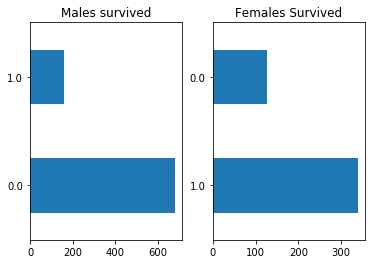

In [19]:
fig, axs = plt.subplots(1,2)
df[df.sex=='male'].survived.value_counts().plot(kind='barh',ax=axs[0], title="Males survived")
df[df.sex=='female'].survived.value_counts().plot(kind='barh',ax=axs[1], title="Females Survived")

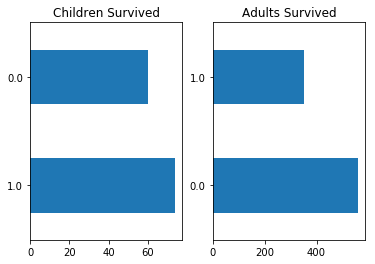

In [20]:
fig, axs = plt.subplots(1,2)
df[df.age<17].survived.value_counts().plot(kind='barh',ax=axs[0], title="Children Survived")
df[df.age>16].survived.value_counts().plot(kind='barh',ax=axs[1], title="Adults Survived")

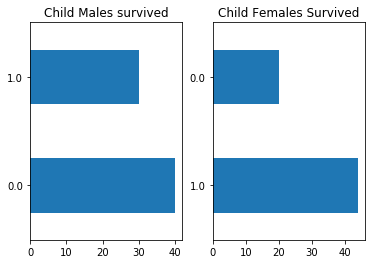

In [21]:
fig, axs = plt.subplots(1,2)
df[(df.age<17) &(df.sex=='male')].survived.value_counts().plot(kind='barh',ax=axs[0], title="Child Males survived")
df[(df.age<17) &(df.sex=='female')].survived.value_counts().plot(kind='barh',ax=axs[1], title="Child Females Survived")

In [22]:
def score_to_numeric(x):
    if x=='female':
        return 1
    if x=='male':
        return 0

In [23]:
# convert the sex category to numeric for analysis
df['sex-val'] = df['sex'].apply(score_to_numeric)

In [24]:
df.groupby ('sex-val')['survived'].mean()
# Results showed that 72% of females were likely to 
# survive compared to 19% males
# Female children (<17 years) were more likely to survive than the boys 

sex-val
0.0    0.190985
1.0    0.727468
Name: survived, dtype: float64

In [25]:
# The second independent variable will be cabin:
df['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [26]:
# Cabin will be dropped, as there are too many missing values:
df.drop("cabin", axis=1,inplace=True)

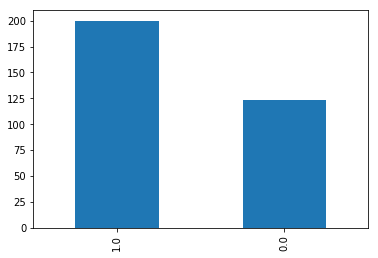

In [27]:
# To review passenger class:
df.loc[df['pclass']==1]['survived'].value_counts().plot(kind='bar')

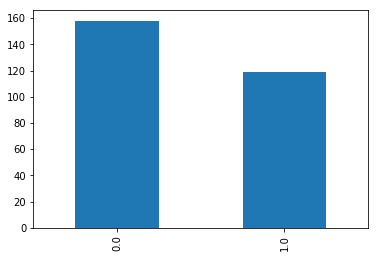

In [28]:
df.loc[df['pclass']==2]['survived'].value_counts().plot(kind='bar')

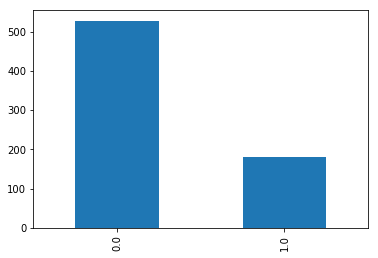

In [29]:
df.loc[df['pclass']==3]['survived'].value_counts().plot(kind='bar')

In [30]:
# First class was most likely to survive

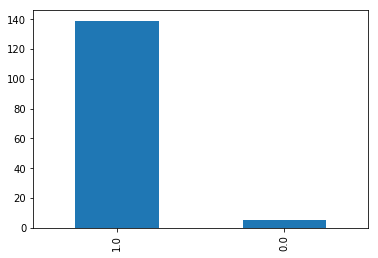

In [31]:
df[(df['sex'] == 'female') & (df['pclass'] == 1)]['survived'].value_counts().plot(kind='bar')

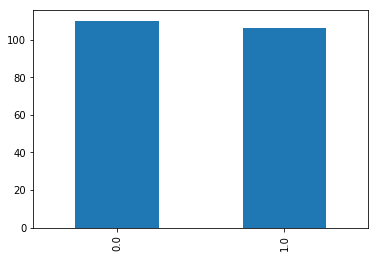

In [32]:
df[(df['sex'] == 'female') & (df['pclass'] == 3)]['survived'].value_counts().plot(kind='bar')

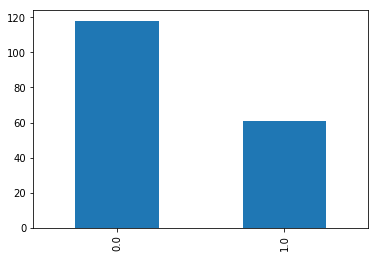

In [33]:
df[(df['sex'] == 'male') & (df['pclass'] == 1)]['survived'].value_counts().plot(kind='bar')

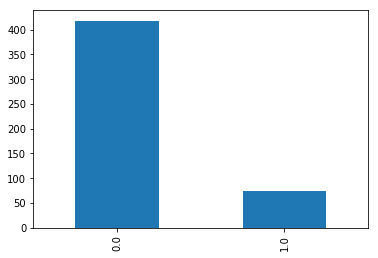

In [34]:
df[(df['sex'] == 'male') & (df['pclass'] == 3)]['survived'].value_counts().plot(kind='bar')

In [35]:
# If you were a female in first class you were most likely to survive
# If you were a male in third class you were least likely to survive

In [87]:
# Prepare pclass data for analysis:
pclass_dummies_df = pd.get_dummies(df['pclass'])
pclass_dummies_df.columns = ['Class_1','Class_2', 'Class_3']
df.drop(['pclass'],axis=1,inplace=True)

df =df.join(pclass_dummies_df)

In [36]:
# We will now look at age as an independent variable:
sum(df['age'].isnull())

264

In [37]:
df['age'].min(), df['age'].max()

(0.16669999999999999, 80.0)

In [38]:
df['age'].mean()

29.8811345124283

In [39]:
# Since there are 264 missing values:
# Impute missing age with mean age:
MeanAge = df.age.mean()

In [40]:
df.age = df.age.fillna(value=MeanAge)

In [41]:
# To show that there are no more missing values
df[df.age.isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,sex-val


In [42]:
# To enhance visual understanding of analysis:
# We will group age data by creating 'AgeBins':
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeBin'] = pd.cut(df['age'], bins)

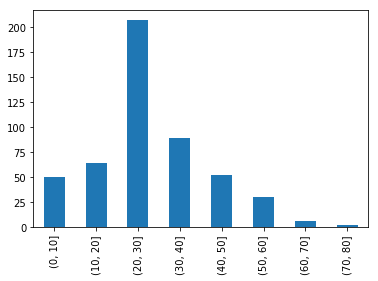

In [43]:
df[df['survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar') 

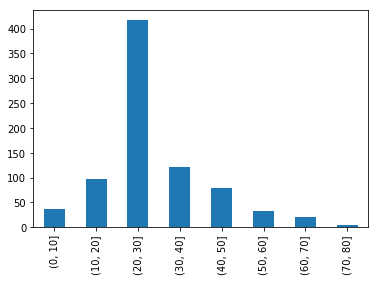

In [44]:
df[df['survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

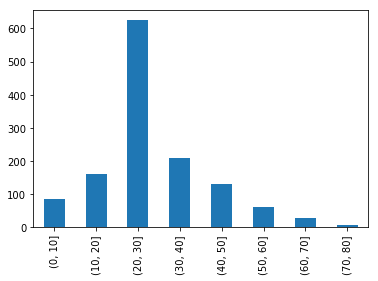

In [45]:
df['AgeBin'].value_counts().sort_index().plot(kind='bar')

In [47]:
# The results showed that age did not tell much about survival of passengers
# The number of people who survived of died was representative of the age distribution of passengers
# In other words most passengers were between 20-30 years old. Most people who lived or died were between that age range.

In [56]:
df


,pclass,survived,sex,age,fare,embarked,boat,body,home.dest,sex-val,AgeBin,Family
0,1.0,1.0,female,29.000000,211.3375,S,2,NaN,"St Louis, MO",1.0,"(20, 30]",0.0
1,1.0,1.0,male,0.916700,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.0,"(0, 10]",1.0
2,1.0,0.0,female,2.000000,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,"(0, 10]",1.0
3,1.0,0.0,male,30.000000,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.0,"(20, 30]",1.0
4,1.0,0.0,female,25.000000,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0,"(20, 30]",1.0
5,1.0,1.0,male,48.000000,26.5500,S,3,NaN,"New York, NY",0.0,"(40, 50]",0.0
6,1.0,1.0,female,63.000000,77.9583,S,10,NaN,"Hudson, NY",1.0,"(60, 70]",1.0
7,1.0,0.0,male,39.000000,0.0000,S,NaN,NaN,"Belfast, NI",0.0,"(30, 40]",0.0
8,1.0,1.0,female,53.000000,51.4792,S,D,NaN,"Bayside, Queens, NY",1.0,"(50, 60]",1.0
9,1.0,0.0,male,71.000000,49.5042,C,NaN,22.0,"Montevideo, Uruguay",0.0,"(70, 80]",0.0


In [60]:
from pandas import Series, DataFrame
import seaborn as sns
sns.set_style('whitegrid')

[<matplotlib.text.Text at 0xeea6978>, <matplotlib.text.Text at 0xec6bc18>]

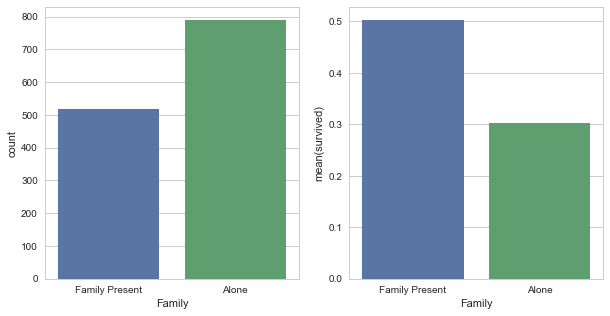

In [62]:
# plot:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='Family', data=df, order=[1,0], ax=axis1)

# To determine the likelihood of survival of passengers with/without family members:
family_surv = df[["Family", "survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='survived', data=family_surv, order=[1,0], ax=axis2)

axis1.set_xticklabels(["Family Present","Alone"], rotation=0)

In [63]:
# Results showed that though there were more people alone on board:
# If you had family members on board you were 20% more likely to survive

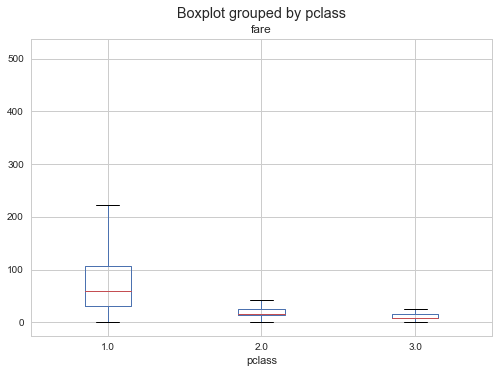

In [64]:
# To look at fare:
df.boxplot(column = 'fare', by = 'pclass')
# Results showed that first class passengers 
# payed significantly more fares than second and third class. 

In [68]:
def clean_data(df):
    df["fare"] = df["fare"].fillna(df["fare"].dropna().median())

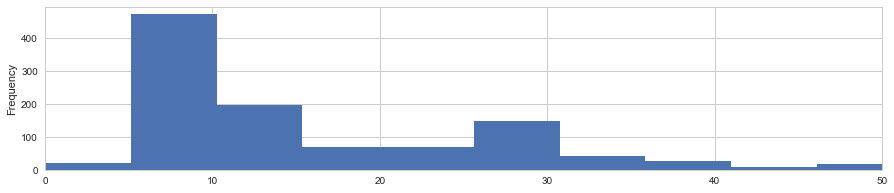

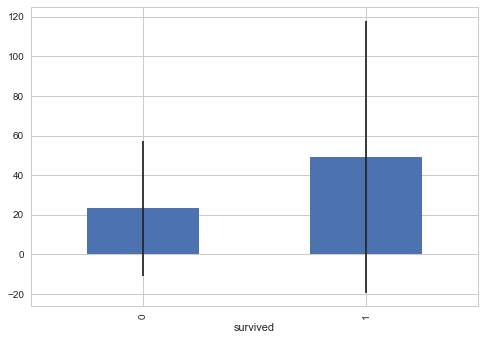

In [69]:
# Analysis of fare 
fare_died = df["fare"][df["survived"] == 0]
fare_survived = df["fare"][df["survived"] == 1]

mean_fare = DataFrame([fare_died.mean(), fare_survived.mean()])
std_fare  = DataFrame([fare_died.std(), fare_survived.std()])

#plot
df['fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

mean_fare.index.names = std_fare.index.names = ["survived"]
mean_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [70]:
# Those who survived paid more than twice the fare of those died;

In [77]:
# embarked
# We will drop embarked as logically it does not seem to be useful for prediction:
df.drop(['embarked'], axis=1,inplace=True)

In [77]:
from sklearn.linear_model import LogisticRegression


In [78]:
df.corr()

,pclass,survived,age,fare,body,sex-val,Family
pclass,1.000000,-0.312469,-0.366370,-0.558629,-0.034642,-0.124617,-0.147393
survived,-0.312469,1.000000,-0.050199,0.244265,NaN,0.528693,0.201719
age,-0.366370,-0.050199,1.000000,0.171892,0.059059,-0.057398,-0.116675
fare,-0.558629,0.244265,0.171892,1.000000,-0.043110,0.185523,0.274895
body,-0.034642,NaN,0.059059,-0.043110,1.000000,0.015903,0.002237
sex-val,-0.124617,0.528693,-0.057398,0.185523,0.015903,1.000000,0.284537
Family,-0.147393,0.201719,-0.116675,0.274895,0.002237,0.284537,1.000000


In [94]:
import statsmodels.formula.api as sm

In [102]:
result = sm.ols(formula='survived ~ sex-val + Class_1 + fare - 1', data=df).fit()

In [103]:
import statsmodels.formula.api as sm

In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               survived   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     213.9
Date:                Thu, 03 Aug 2017   Prob (F-statistic):          7.93e-113
Time:                        19:08:23   Log-Likelihood:                -650.30
No. Observations:                1308   AIC:                             1309.
Df Residuals:                    1304   BIC:                             1329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[female]     0.6433      0.021     30.428      0.000       0.602       0.685
sex[male]       0.1346      0.015      8.928      0.000       0.105       0.164
Class_1         0.2373      0.032      7.431      0.000       0.175       0.300
fare            0.0002      0.000      0.869      0.385      -0.000       0.001
==============================================================================
Omnibus:                       50.881   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.213
Skew:                           0.505   Prob(JB):                     6.22e-13
Kurtosis:                       2.887   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# The results of the regression shows that females had the highest chance of survival followed by first class passengers.
# Results from analysis showed  that if you were a female in first class you had over 90% chance of survival.